# What is ML
it is the subdomain of Computer Science, using algorithms which help the computer to learn from date without explicit programming(process)

## AI
It is a area of Computer Science, where the goal machine be able  to perform human like tasks and simulate human behavior
## ML
it is a subset of AI tries to solve specific problem and make predictions using data with code and math
## Data Science

It is a field attempts to find patterns and draw insights from date(it might use ML)



# Types of ML
## Supervised Leaning
We use labeled input(meaning input has a corresponding output label is like when we know them the information name) to train models and learn outputs
--
### Features
- Qualitative: Categorical data(finite number of categories or groups)
  - No inherent order
  
  ##### Example:
  ###### We have different parts in the life baby, child, teen young adult, adult, old adult and very old adult, is has a order, baby is nearly to child than old adult to child.
  ### others examples of binary classification
  it is like  we have two options, it is true or it is false
  - Positive /negative
  - spam / no spam
  - dog / cat
  #### Accuracy
  The loss will be less when the perform is better
  ### multi class classification
  We have more two options
  - cat/ dog/ horse
  - orange/ apple/ pear
  - plant species
  ### Tasks
  ##### Classification
  Predict discrete classes
  ##### Regression
  Predict continuous values
#### Rules
- We enter inputs as data there and the machine return a output
  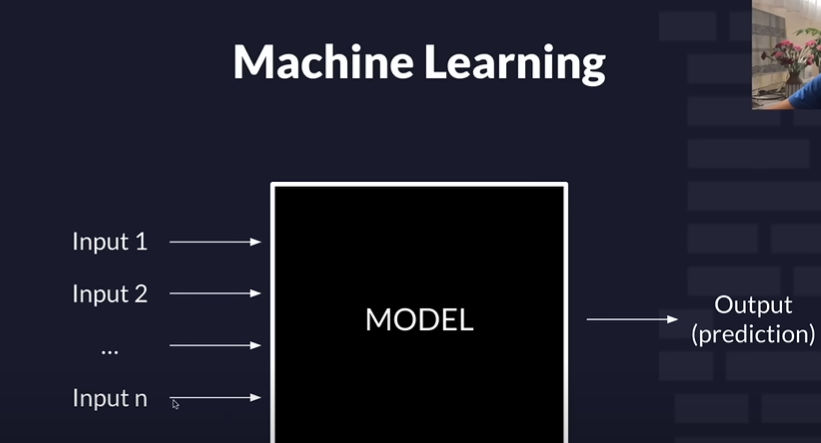
#### Example:
We have three photos, three animals like Dog, Cat and Horse, we says to machine what kind of animals are there, the way to say them, is with the label.
## Unsupervised Learning
Uses unlabeled data to learn about patterns in  data
#### Example:
We have three photos, the machine don't know kind of animal are them but it put in different groups, checking theirs characteristics looking for patterns some of them share those characteristics, and when we put new data, the machine put together the data sharing some patterns
## Reinforcement Learning
It learn in interactive environment on rewards and penalties
it learn by itself, is like with train it with mistakes and says to the machine his mistakes to be better in the next time
#### Example:
We show it a phono of a bird, the machine tries to guess what it is the machine says, it is a computer, we say NO, the machine says it is a farm and we say NO and the machine say it is a dog we say No and the machine say it is a bird, and We say YES sir , and the machine now know what is it.


# Start



In [3]:
# We import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] # We put the names of these datasets columns
df =pd.read_csv("magic04.data", names= cols) # To read the dataset
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Explication
the column class have names g and h
G represents gammas 
H represents hadrones 

We convert them to numbers 

In [5]:
# df["class"].unique() # It returns the values of the column class

## We need to convert them to numbers
df["class"] = (df["class"] =="g").astype(int)

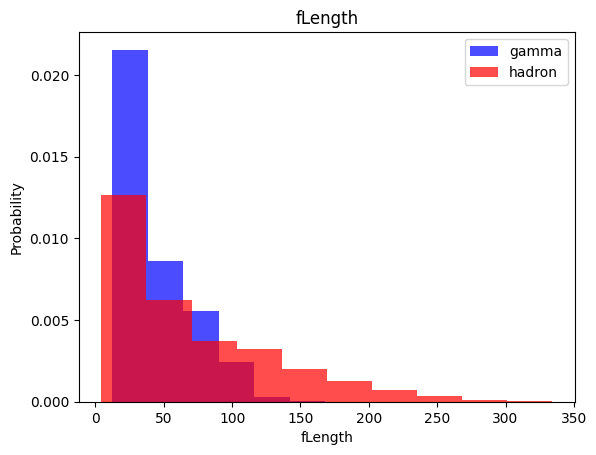

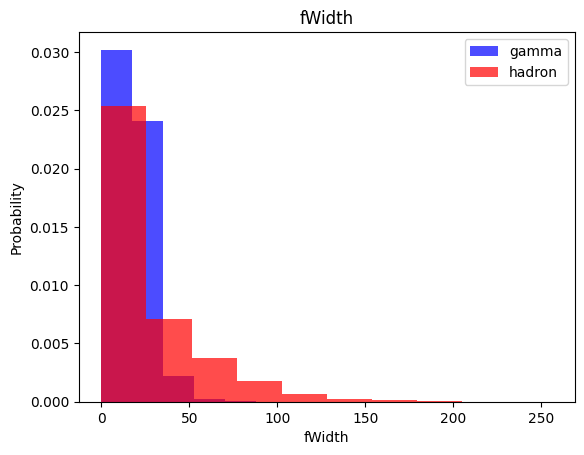

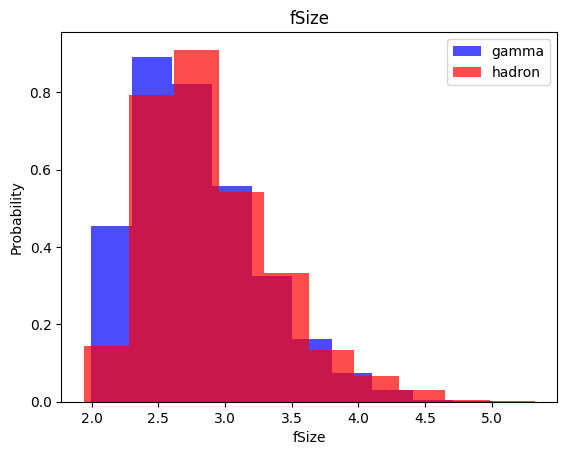

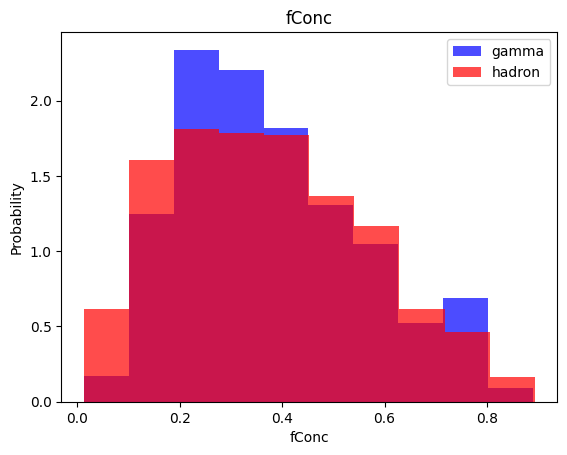

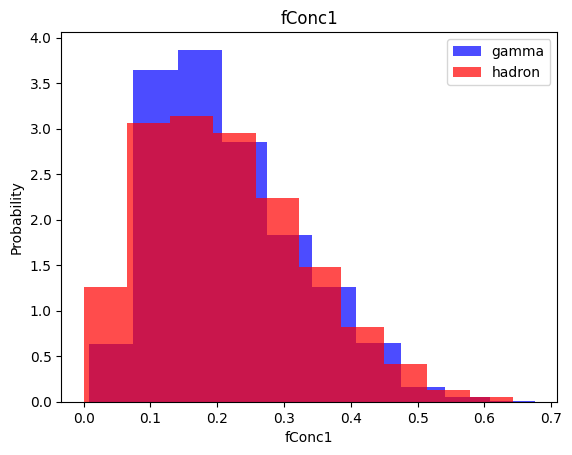

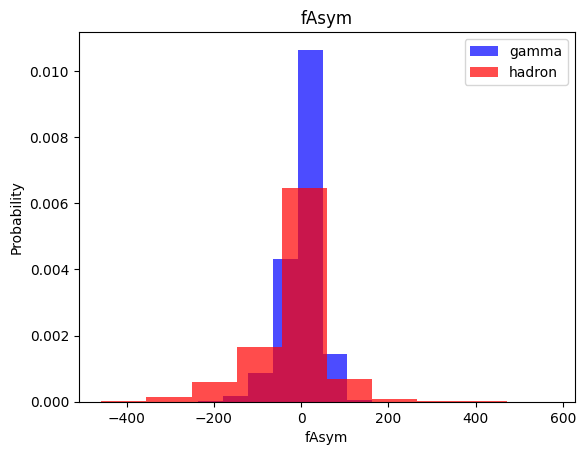

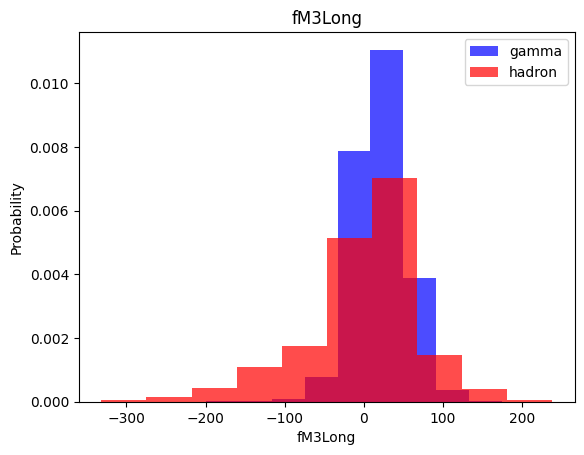

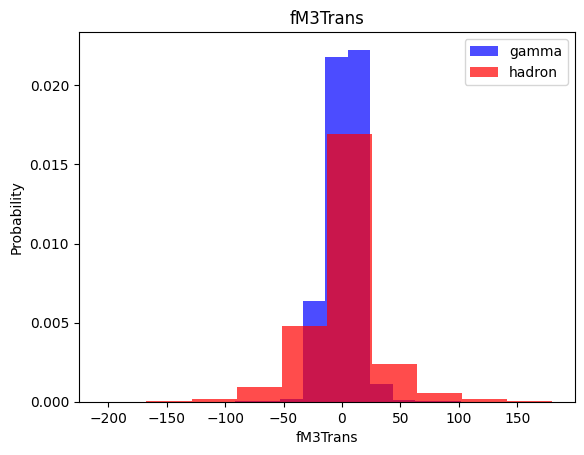

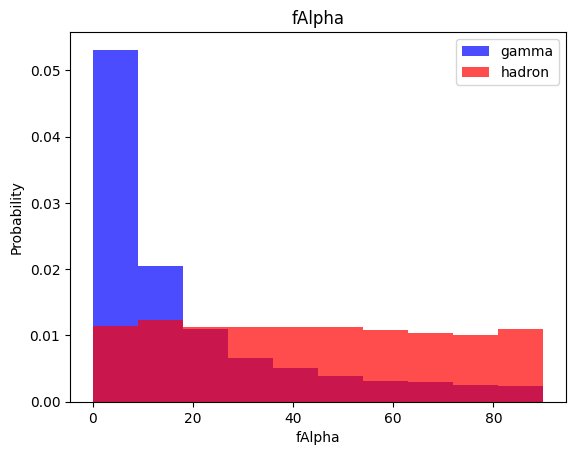

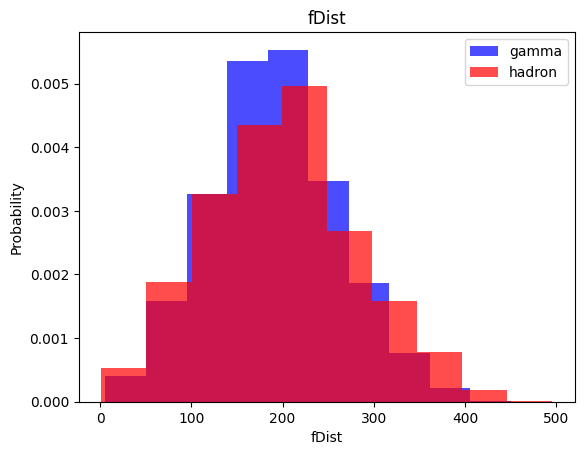

In [19]:
for label in cols[:-1]: # Start in the last one
  plt.hist(df[df["class"]== 1][label], color= "blue", label= "gamma", alpha = 0.7, density= True) # put as a histogram
  plt.hist(df[df["class"]== 0][label], color= "red", label="hadron", alpha = 0.7, density= True) # put as a histogram
  
  plt.title(label)
  
  
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation,  test datasets

First, we need to know some concepts like the lost function
### Loss Function
It's the different between the predicted value and the real value(the data we have in the dataset)

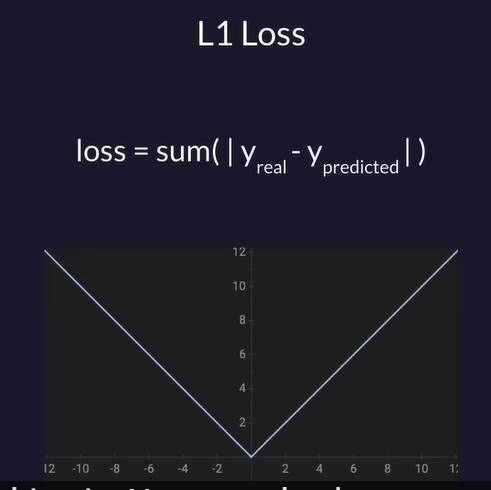
- Characteristics
  - We' ll try to find the absolute value of the substract of  the real value and the predicted value

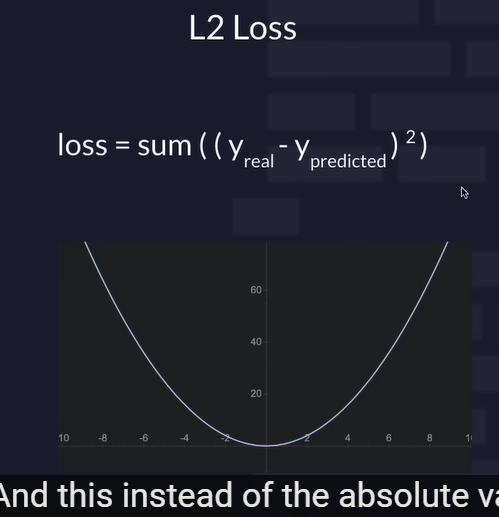
- Characteristics
  - It's the same like L1, but we need to square  it
  - When more closer are the data less penalty it has, and much penalty in the other case(when the real and the predicte  value)
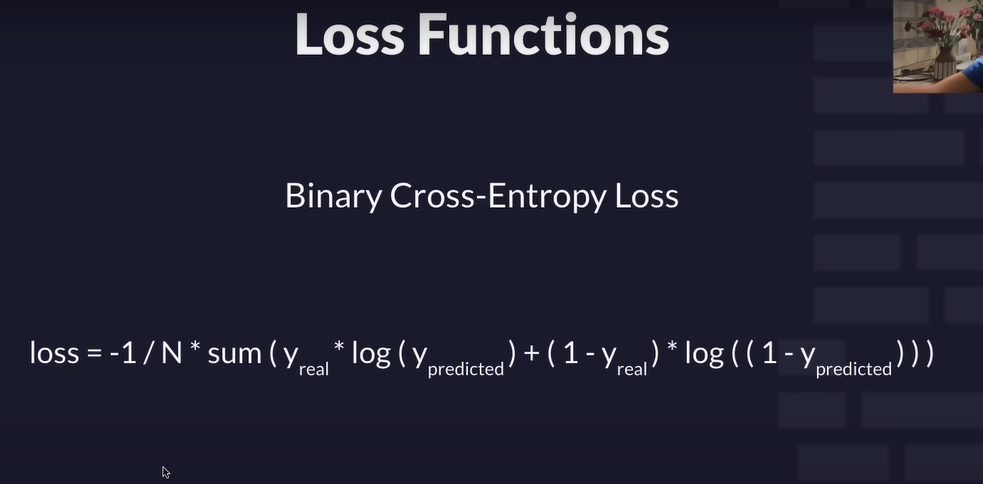
- Characteristics
  - This one is form binary problems as its name says
  - We just need to know that lost decreases as the performance gets better.
### Metrics of Performance
#### Accuracy
It's to calculate how good is the model, to calculate the percent of success of the model.
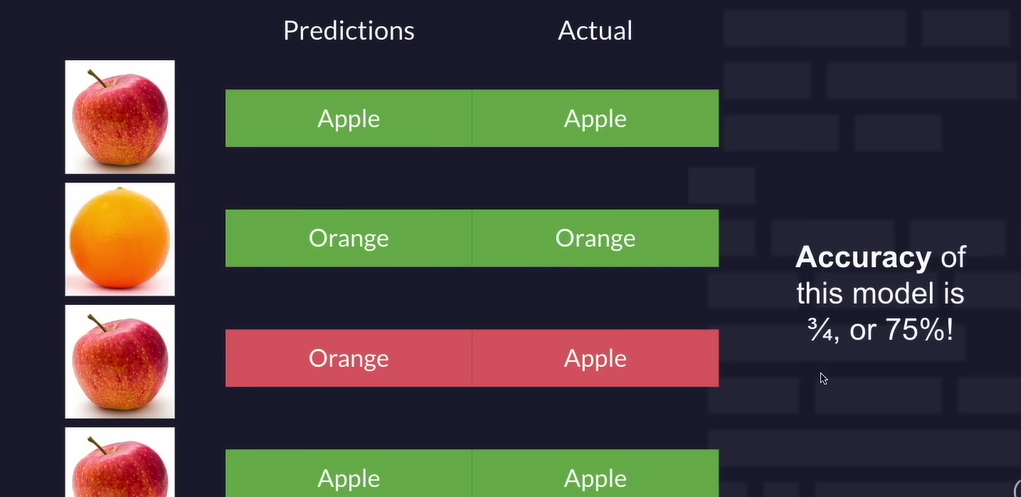
- Characteristics
  - In this example, there are 4 predicted values and with 4 real value, each of them is equal to 25%
  - We have just one trouble(Orange but it must be Apple), so a predicted value is bad(25%)
  - And the rest are good, so 100% - 25% = 75%, this last value is the result of the accuracy, it means the model have a 75% percent of sucess


In [7]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)) , int(0.8 * len(df))])

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  
  scalar = StandardScaler() # to transform X
  
  X = scalar.fit_transform(X)
  
  if oversample :
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)
  
  data = np.hstack((X,np.reshape(y,(-1, 1))))
  
  return data, X, y


In [9]:
# print(len(train[train["class"] ==1])) # gamma
# print(len(train[train["class"] ==0]))# hadron


train, X_train, y_train = scale_dataset(train, oversample= True)
valid, X_valid, y_valid = scale_dataset(valid, oversample= False)
train, X_test, y_test = scale_dataset(test, oversample= False)

In [10]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))


14768
7384
7384


# K-nearest neighbors
This is to put a data, knowing the other data. We have a new data, and knowing the place where the others data are, we can know what kind of data is the new one
- The k is the numbers of points(data), we'll take
#### Formula to soft out the distance between the points
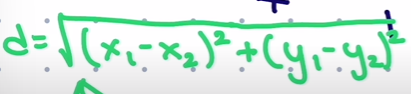

In [11]:
# We import the libraries we'll use

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn_model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1364
           1       0.85      0.88      0.86      2440

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [15]:
y+

SyntaxError: invalid syntax (368336288.py, line 1)

# Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model= nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))